In [115]:
import pandas as pd
# Feel free to add any imports you need
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

In [116]:
candidate_scores = pd.read_csv('data/candidate_scores.csv')
hr_scores = pd.read_csv('data/hr_scores.csv')

# Section 1

## merge the datasets

First, I'll check if there are rows with no names in the name column in 'candidate_scores' and 'hr_scores':

In [117]:
# Check for rows with missing candidate names
missing_candidate_names_in_scores = candidate_scores['candidateName'].isna().any()
missing_candidate_names_in_hr = hr_scores['candidateName'].isna().any()

print(f"Missing candidate names in candidate_scores: {missing_candidate_names_in_scores}")
print(f"Missing candidate names in hr_scores: {missing_candidate_names_in_hr}")

Missing candidate names in candidate_scores: True
Missing candidate names in hr_scores: False


Let's take a look at the data:

In [118]:
candidate_scores.head()

,id,createdAt,updatedAt,candidateName,overallScore,dataSources,status,professionalScore,culturalScore,teamScore,punchline,contextID
0,38,27:17.2,27:52.4,Zephyr Rift Stormwind,80.0,"{Linkedin,CV}",Completed,79,74.0,75.0,"Strong fit with minor industry-specific gap, v...",10
1,39,27:48.9,28:30.1,Luna Moonbeam,75.0,"{Linkedin,CV}",Completed,82,62.0,60.0,"Strong foundation, potential for growth in new...",10
2,35,25:30.7,26:11.9,Raven Nightshade ©±ð�©¨ð�©¥ð�©§ð�©¥ð�©¯ ð�©²ð�...,50.0,"{Linkedin,CV}",Completed,45,38.0,37.5,"Promising candidate with potential, needs indu...",10
3,36,26:17.4,27:00.1,Phoenix Ashfire,70.0,"{Linkedin,CV}",Completed,84,74.0,75.0,Potential fit with room for growth in industry...,10
4,37,26:51.1,27:28.1,Echo Whisperwind ðŸ‡®ðŸ‡±,70.0,"{Linkedin,CV}",Completed,81,64.0,65.0,Skilled product manager with potential to adap...,10


In [119]:
hr_scores.head()

,candidateName,hrScore
0,Zephyr Rift Stormwind,2
1,Luna Moonbeam,2
2,Raven Nightshade',4
3,Phoenix Ashfire,2
4,Echo Whisperwind,3


In [120]:
candidate_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 79 non-null     int64  
 1   createdAt          79 non-null     object 
 2   updatedAt          79 non-null     object 
 3   candidateName      56 non-null     object 
 4   overallScore       56 non-null     float64
 5   dataSources        79 non-null     object 
 6   status             79 non-null     object 
 7   professionalScore  79 non-null     int64  
 8   culturalScore      79 non-null     float64
 9   teamScore          79 non-null     float64
 10  punchline          56 non-null     object 
 11  contextID          79 non-null     int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 7.5+ KB


In [121]:
hr_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   candidateName  52 non-null     object
 1   hrScore        52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 964.0+ bytes


We can see that there are names with symbols at the end. I would like to clean it. Also I would like to put NA where there is no name the the 'candidateName' column in 'candidate_scores'

In [122]:
# Function to clean candidate names
def clean_name(name):
    if pd.isna(name):
        return 'NA'
    # Ensure the name is a string
    name = str(name).strip()
    # Replace empty names with 'NA'
    if name == '':
        return 'NA'
    # Remove non-printable characters
    name = re.sub(r'[^\x00-\x7F]+', '', name)
    # Remove symbols at the end of the name
    name = re.sub(r'\W+$', '', name)
    return name

In [123]:
# Apply the cleaning function to candidate names
candidate_scores['candidateName'] = candidate_scores['candidateName'].apply(clean_name)
hr_scores['candidateName'] = hr_scores['candidateName'].apply(clean_name)

Now let's check if there are still missing values in 'candidateName':

In [124]:
# Check for rows with missing candidate names
missing_candidate_names_in_scores_new = candidate_scores['candidateName'].isna().any()
missing_candidate_names_in_hr_new = hr_scores['candidateName'].isna().any()

print(f"Missing candidate names in candidate_scores: {missing_candidate_names_in_scores_new}")
print(f"Missing candidate names in hr_scores: {missing_candidate_names_in_hr_new}")

Missing candidate names in candidate_scores: False
Missing candidate names in hr_scores: False


Now I will merge the 2 datasets.<br>
According to the info check I did, there are more candidates in 'candidate_scores'.<br>
I will to an outer merge to get all the rows from 'candidate_scores'.

In [125]:
merged_data = pd.merge(candidate_scores, hr_scores, on='candidateName', how='outer', suffixes=('', '_hr'))

In [126]:
# Create the final DataFrame with required columns
combined_candidates = merged_data[['candidateName', 'overallScore', 'professionalScore', 'culturalScore', 'teamScore', 'hrScore']]

In [127]:
combined_candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   candidateName      83 non-null     object 
 1   overallScore       56 non-null     float64
 2   professionalScore  79 non-null     float64
 3   culturalScore      79 non-null     float64
 4   teamScore          79 non-null     float64
 5   hrScore            55 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.0+ KB


In [128]:
combined_candidates.to_csv('data/combined_candidates.csv', index=False)

## Explore and Visualize the data

In [129]:
combined_candidates = pd.read_csv('data/combined_candidates.csv')

First, Let's take a look at the first few rows and the basic statistics of the dataset:

In [130]:
combined_candidates.head()

,candidateName,overallScore,professionalScore,culturalScore,teamScore,hrScore
0,Aether Voidwalker,50.0,49.0,38.0,40.0,4.0
1,Ash Phoenixborn,65.0,68.0,55.0,52.5,4.0
2,Aspen Leafdancer,60.0,71.0,47.0,42.5,4.0
3,Aura Spiritglow,70.0,78.0,68.0,67.5,1.0
4,Aurora Bloom Borealis,62.0,66.0,52.0,50.0,NaN


In [131]:
combined_candidates.describe()

,overallScore,professionalScore,culturalScore,teamScore,hrScore
count,56.000000,79.000000,79.000000,79.000000,55.000000
mean,68.410714,52.797468,44.116456,43.968354,3.200000
std,9.042881,35.157659,29.773153,29.771065,1.112222
min,45.000000,0.000000,0.000000,0.000000,1.000000
25%,65.000000,0.000000,0.000000,0.000000,2.000000
50%,70.000000,73.000000,58.200000,57.500000,4.000000
75%,75.000000,79.000000,67.500000,67.500000,4.000000
max,80.000000,89.000000,78.000000,79.000000,4.000000


In [132]:
combined_candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   candidateName      60 non-null     object 
 1   overallScore       56 non-null     float64
 2   professionalScore  79 non-null     float64
 3   culturalScore      79 non-null     float64
 4   teamScore          79 non-null     float64
 5   hrScore            55 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.0+ KB


We can learn that there are some missing values: 60 out of 83 entries have candidate names, which means 23 names are missing. Also, there are some feature (scores) with missing values.

The 'hrScore' is much more consistent and shows less variability compared to other scores.

I would like to see the distribution of the overall scores:

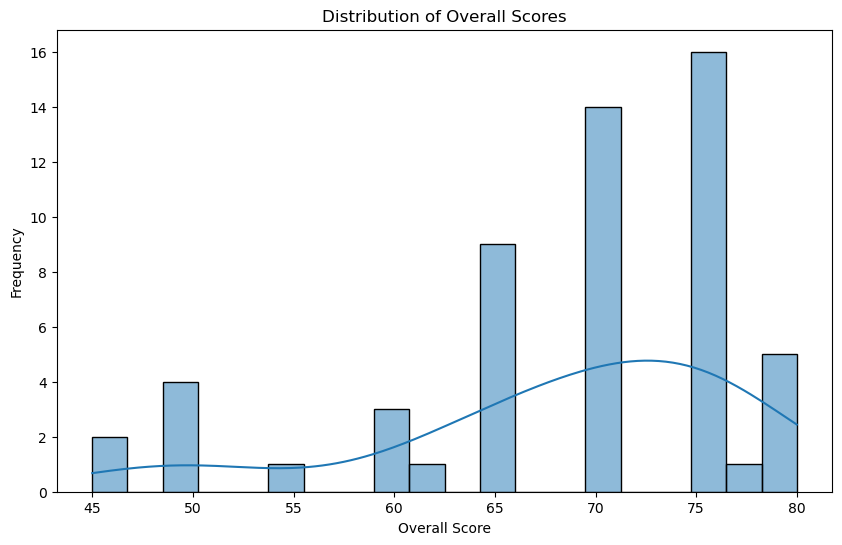

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_candidates['overallScore'], kde=True, bins=20)
plt.title('Distribution of Overall Scores')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.show()

We can see that in general there are more overall scores with higher score than with low scores.

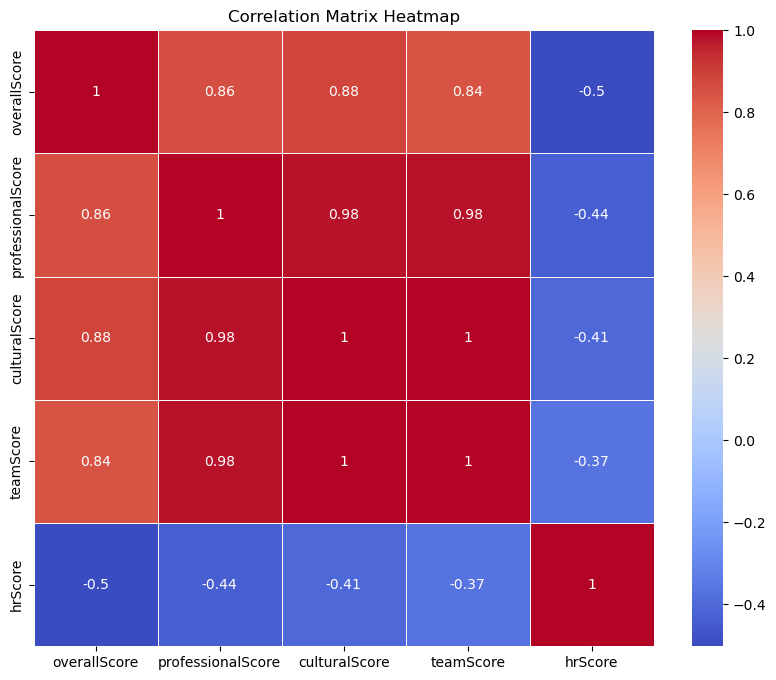

In [134]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = combined_candidates[['overallScore', 'professionalScore', 'culturalScore', 'teamScore', 'hrScore']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

We can learn that the perfect correlation between 'culturalScore' and 'teamScore' suggests that they are identical features. This could mean that these columns might contain exactly the same data, which could be an error in the dataset.

# Section 2

First, I will create a binary classification column where HR scores of 1 or 2 are labeled as "GO" and scores of 3 or 4 are labeled as "NO-GO".

In [135]:
combined_candidates['hrCategory'] = combined_candidates['hrScore'].map({1: 'GO', 2: 'GO', 3: 'NO-GO', 4: 'NO-GO'})

I will use various threshold values for the numerical scores to categorize candidates into "GO" or "NO-GO".

In [136]:
thresholds = np.arange(0.0, 101.0, 1.0)

I will initialize a list to store performance metrics (accuracy).<br>
Accuracy measures the overall correctness of the model by calculating the proportion of correctly classified instances out of the total instances.<br>
I only need to evaluate a binary decision (GO vs. NO-GO), so accuracy can provide a clear and direct measure.

In [137]:
accuracies = []

In [100]:
# Ensure 'hrCategory' is a string
combined_candidates['hrCategory'] = combined_candidates['hrCategory'].astype(str)

# Check for and convert any non-numeric values in 'overallScore'
combined_candidates['overallScore'] = pd.to_numeric(combined_candidates['overallScore'], errors='coerce')

# Drop rows with NaN values in critical columns
combined_candidates = combined_candidates.dropna(subset=['overallScore', 'hrCategory'])

For each threshold, I will compute the predicted categories and compare them with the actual HR categories.
I wll iterate over each threshold to compute performance metrics.

In [101]:
for threshold in thresholds:
    # Predict categories based on the threshold
    combined_candidates['predictedCategory'] = np.where(combined_candidates['overallScore'] >= threshold, 'GO', 'NO-GO')
    
    # Compute performance metrics
    accuracy = accuracy_score(combined_candidates['hrCategory'], combined_candidates['predictedCategory'])
    accuracies.append(accuracy)

Find the threshold with the maximum accuracy:

In [102]:
best_threshold = thresholds[np.argmax(accuracies)]

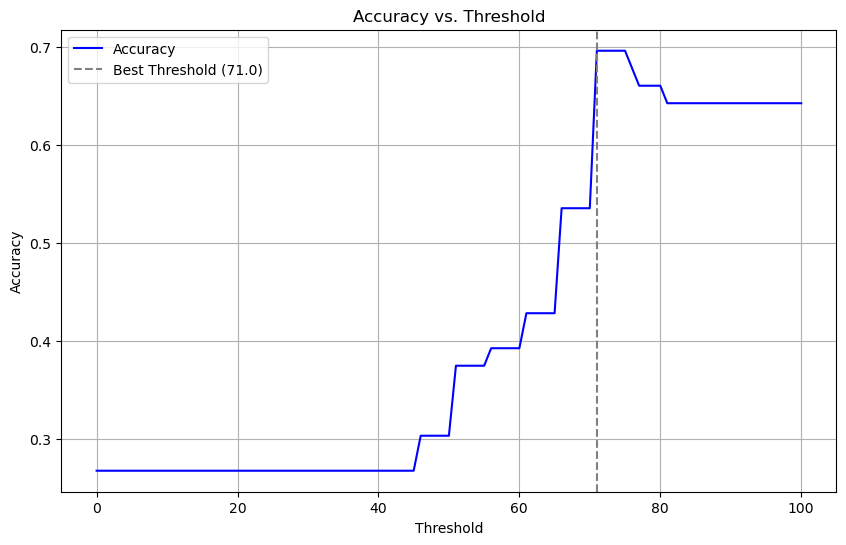

In [95]:
# Plot accuracy vs. thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy', color='blue')
plt.axvline(x=best_threshold, color='gray', linestyle='--', label=f'Best Threshold ({best_threshold})')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

The best threshold and its accuracy are:

In [96]:
print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {accuracies[np.argmax(accuracies)]:.4f}")

Best Threshold: 71.0
Best Accuracy: 0.6964


# Section 3

**Method 1: Simple Averaging**<br>
Combine scores by taking the average of the three scores.

In [104]:
combined_candidates['combinedScore_avg'] = combined_candidates[['professionalScore', 'culturalScore', 'teamScore']].mean(axis=1)

**Method 2+3: Max or Min Scores**<br>
Use the maximum or minimum of the three scores.

In [105]:
combined_candidates['combinedScore_max'] = combined_candidates[['professionalScore', 'culturalScore', 'teamScore']].max(axis=1)
combined_candidates['combinedScore_min'] = combined_candidates[['professionalScore', 'culturalScore', 'teamScore']].min(axis=1)

There is another idea of combining with Weighted Averaging. Assign weights to each score if we believe some scores are more important than others. I cannot do it because I don't have information about the importance of each score, but it was important for me to note that I think this can be a good method.

For each combined score method, I will find the optimal threshold to classify "GO" vs "NO-GO":

In [112]:
# Define a range of threshold values
thresholds_section3 = np.arange(0.0, 101.0, 1.0)

# Initialize dictionaries to store results
results = {}

# List of combined score columns
combined_score_columns = ['combinedScore_avg', 'combinedScore_max', 'combinedScore_min']

for score_column in combined_score_columns:
    accuracies = []
    
    for threshold in thresholds_section3:
        # Predict categories based on the threshold
        combined_candidates['predictedCategory'] = np.where(combined_candidates[score_column] >= threshold, 'GO', 'NO-GO')
        
        # Compute accuracy
        accuracy = accuracy_score(combined_candidates['hrCategory'], combined_candidates['predictedCategory'])
        accuracies.append(accuracy)
    
    # Find the threshold with the maximum accuracy
    best_threshold = thresholds[np.argmax(accuracies)]
    best_accuracy = accuracies[np.argmax(accuracies)]
    
    # Store results
    results[score_column] = {
        'best_threshold': best_threshold,
        'best_accuracy': best_accuracy
    }

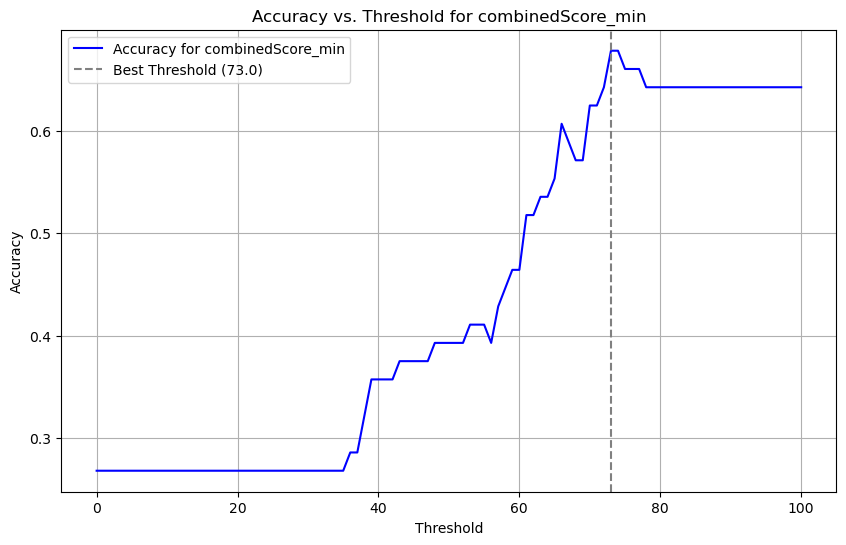

In [113]:
    # Plot accuracy vs. thresholds
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracies, label=f'Accuracy for {score_column}', color='blue')
    plt.axvline(x=best_threshold, color='gray', linestyle='--', label=f'Best Threshold ({best_threshold})')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Threshold for {score_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [114]:
# Print the results
for score_column, metrics in results.items():
    print(f"Results for {score_column}:")
    print(f"Best Threshold: {metrics['best_threshold']}")
    print(f"Best Accuracy: {metrics['best_accuracy']:.4f}")
    print()

Results for combinedScore_avg:
Best Threshold: 77.0
Best Accuracy: 0.6964

Results for combinedScore_max:
Best Threshold: 82.0
Best Accuracy: 0.6964

Results for combinedScore_min:
Best Threshold: 73.0
Best Accuracy: 0.6786



As the result shows, the methods that gave the best accuracy are  max score and avg.